# Step 1: Import the digits dataset from sklearn and split it into train and test sets.

### Digits dataset in sklearn.datasets:

This dataset is made up of 1797 8x8 images. 
* Number of classes: 10 --> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
* Number of samples: 1797
* Number of features: 64
* Each sample represents the 64 pixel values of a 8x8 image.
* Range of each pixel value is 0 - 16.

In [4]:
from sklearn.datasets import load_digits
dataset=load_digits()
print("feature names")
print(dataset.feature_names)
print("target names")
print(dataset.target_names)


feature names
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
target names
[0 1 2 3 4 5 6 7 8 9]


In [5]:
X=dataset.data
y=dataset.target
print("Input data shape:",X.shape)
print("Input Target shape:",y.shape)

Input data shape: (1797, 64)
Input Target shape: (1797,)


[[  0   0   0   0]
 [255 255 255 255]
 [  0   0   0   0]]


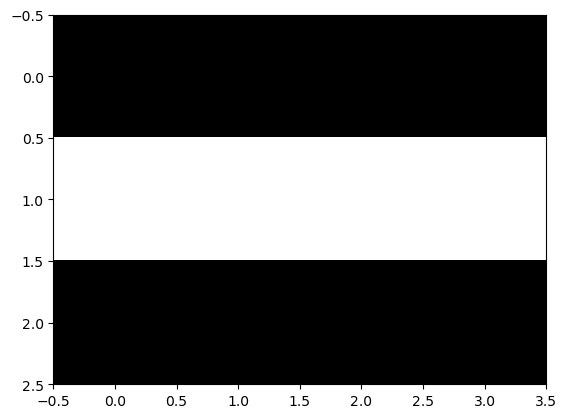

In [6]:
import numpy as np
import matplotlib.pyplot as plt
img=np.array([[0,0 ,0 ,0],[255, 255 ,255 ,255],[0, 0, 0, 0]])
print(img)
plt.imshow(img,cmap="gray")


0


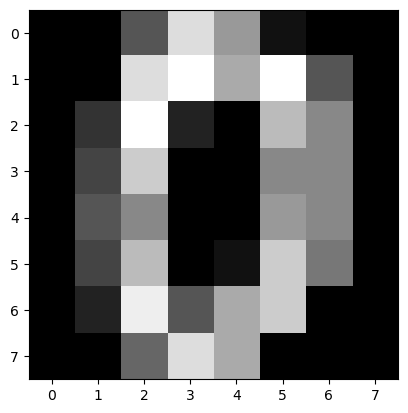

In [7]:
import matplotlib.pyplot as plt

img1=X[0].reshape((8,8))
plt.imshow(img1, cmap="gray")
print(y[0])


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=15,test_size=0.2)
print("Training Input shape:",X_train.shape)
print("Training output shape:",y_train.shape)
print("Testing Input Shape;",X_test.shape)
print("testing output shape:",y_test.shape)

Training Input shape: (1437, 64)
Training output shape: (1437,)
Testing Input Shape; (360, 64)
testing output shape: (360,)


## Step 2: Build the model

* Import the class SVC from sklearn.svm module
* Create a model objet using SVC class
* Use fit method to train the model with training dataset.

In [9]:
from sklearn.svm import SVC
svm1=SVC()
svm1.fit(X_train,y_train)

SVC()

## Step 3: Test and Evaluate the model.

In [10]:
y_pred=svm1.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
y_pred=svm1.predict(X_test)
print("Confusion_matrix:\n",confusion_matrix(y_pred,y_test))
print()
print("Accuracy score:",accuracy_score(y_pred,y_test))


Confusion_matrix:
 [[30  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  2  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  1]
 [ 1  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  1  0  0  0  0 33  0]
 [ 0  0  0  0  1  0  0  0  0 42]]

Accuracy score: 0.9833333333333333


* Use predict method to predict the class for unseen data samples.
* Import accuracy_score function from sklearn.metrics module for evaluation

## Step 4: Evaluate the model with different kernels

* SVC class takes a parameter kernel which can take one of linear / poly / rbf / sigmoid.
* rbf (Radial Basis Function) is the default value.

In [12]:
svm2=SVC(kernel="linear")
svm2.fit(X_train,y_train)
y_pred=svm2.predict(X_test)
print("Confusion_matrix:\n",confusion_matrix(y_pred,y_test))
print()
print("Accuracy score:",accuracy_score(y_pred,y_test))



Confusion_matrix:
 [[31  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  1  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  1  0  0]
 [ 0  0  0  0  0  0 37  0  1  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  0  0  1  0  0  0  0 34  1]
 [ 0  0  0  0  0  0  0  0  0 42]]

Accuracy score: 0.9861111111111112


In [13]:
svm3=SVC(kernel="poly")
svm3.fit(X_train,y_train)
y_pred=svm3.predict(X_test)
print("Accuracy score:",accuracy_score(y_pred,y_test))


Accuracy score: 0.9888888888888889


In [14]:
svm4=SVC(kernel="sigmoid")
svm4.fit(X_train,y_train)
y_pred=svm4.predict(X_test)
print("Accuracy score:",accuracy_score(y_pred,y_test))


Accuracy score: 0.9138888888888889
